In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
# r2_score is used when multiple independent columns are used to create a model
from sklearn.metrics import r2_score

In [2]:
# TASK1
df = pd.read_csv(r'DS1_C9_S3_Practice_MedicalPremium_Data.csv')
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [3]:
df.describe

<bound method NDFrame.describe of      Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                  

In [4]:
# TASK2
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [5]:
df.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

In [6]:
df["Diabetes"] = df["Diabetes"].astype("category")
df["BloodPressureProblems"] = df["BloodPressureProblems"].astype("category")
df["AnyTransplants"] = df["AnyTransplants"].astype("category")
df["AnyChronicDiseases"] = df["AnyChronicDiseases"].astype("category")
df["KnownAllergies"] = df["KnownAllergies"].astype("category")
df["HistoryOfCancerInFamily"] = df["HistoryOfCancerInFamily"].astype("category")



In [7]:
category = df.select_dtypes(exclude = "number")
numeric = df.select_dtypes(include = "number")

In [8]:
for i in df:
    vc = df[i].value_counts()
    print(vc)

Age
43    30
27    27
42    27
35    26
45    25
59    25
44    24
25    24
48    24
66    23
46    23
18    23
33    23
49    23
32    22
29    22
47    22
64    22
24    22
30    22
19    21
62    21
21    21
31    20
51    20
50    20
54    20
63    19
36    19
52    19
40    19
22    19
37    18
34    18
41    18
38    17
20    17
55    17
53    17
60    17
28    17
65    17
61    16
58    16
56    15
23    13
26    13
57    12
39    11
Name: count, dtype: int64
Diabetes
0    572
1    414
Name: count, dtype: int64
BloodPressureProblems
0    524
1    462
Name: count, dtype: int64
AnyTransplants
0    931
1     55
Name: count, dtype: int64
AnyChronicDiseases
0    808
1    178
Name: count, dtype: int64
Height
164    42
166    42
174    38
165    38
175    35
176    34
163    34
170    32
169    32
168    31
167    29
172    29
178    28
177    28
179    28
159    27
156    27
162    27
173    26
181    26
161    26
182    24
158    24
185    24
180    24
160    23
171    23
184    21
1

In [9]:
# TASK2
from sklearn.preprocessing import StandardScaler
def scaling_numeric():
    data_types = ["int64"]
    new_df = df.select_dtypes(include = data_types)
    scaler_obj = StandardScaler()
    df_scaled = pd.DataFrame(scaler_obj.fit_transform(new_df.to_numpy()), columns = new_df.columns)
    return df_scaled

In [10]:
df_scaled = scaling_numeric()
df_scaled

,Age,Height,Weight,NumberOfMajorSurgeries,PremiumPrice
0,0.233197,-1.306105,-1.399250,-0.891187,0.106210
1,1.307981,1.170852,-0.277062,-0.891187,0.746721
2,-0.411674,-1.008870,-1.258976,0.444239,-0.214045
3,0.734763,1.468086,1.125674,1.779665,0.586594
4,-0.268369,-0.216244,0.774990,0.444239,-0.214045
...,...,...,...,...,...
981,-1.701415,0.080991,-0.697882,-0.891187,-1.495067
982,1.594590,-1.504261,-0.487472,3.115090,0.586594
983,1.021372,-1.306105,-0.417335,0.444239,0.746721
984,0.376502,-1.008870,-0.277062,0.444239,2.347998


In [11]:
final_df = pd.concat([df_scaled,category], axis = 1)
final_df

,Age,Height,Weight,NumberOfMajorSurgeries,PremiumPrice,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily
0,0.233197,-1.306105,-1.399250,-0.891187,0.106210,0,0,0,0,0,0
1,1.307981,1.170852,-0.277062,-0.891187,0.746721,1,0,0,0,0,0
2,-0.411674,-1.008870,-1.258976,0.444239,-0.214045,1,1,0,0,0,0
3,0.734763,1.468086,1.125674,1.779665,0.586594,1,1,0,1,0,0
4,-0.268369,-0.216244,0.774990,0.444239,-0.214045,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
981,-1.701415,0.080991,-0.697882,-0.891187,-1.495067,0,0,0,0,0,0
982,1.594590,-1.504261,-0.487472,3.115090,0.586594,1,1,0,0,0,0
983,1.021372,-1.306105,-0.417335,0.444239,0.746721,0,1,0,0,0,0
984,0.376502,-1.008870,-0.277062,0.444239,2.347998,1,1,0,0,1,0


In [12]:
no_outlier = final_df.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

In [13]:
for col in df_scaled.columns:
    outlier_cleanup(col)

In [14]:
no_outlier

,Age,Height,Weight,NumberOfMajorSurgeries,PremiumPrice,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily
0,0.233197,-1.306105,-1.399250,-0.891187,0.106210,0,0,0,0,0,0
1,1.307981,1.170852,-0.277062,-0.891187,0.746721,1,0,0,0,0,0
2,-0.411674,-1.008870,-1.258976,0.444239,-0.214045,1,1,0,0,0,0
3,0.734763,1.468086,1.125674,1.779665,0.586594,1,1,0,1,0,0
4,-0.268369,-0.216244,0.774990,0.444239,-0.214045,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
981,-1.701415,0.080991,-0.697882,-0.891187,-1.495067,0,0,0,0,0,0
982,1.594590,-1.504261,-0.487472,2.447377,0.586594,1,1,0,0,0,0
983,1.021372,-1.306105,-0.417335,0.444239,0.746721,0,1,0,0,0,0
984,0.376502,-1.008870,-0.277062,0.444239,2.267935,1,1,0,0,1,0


In [15]:
my_corr = no_outlier.corr()[['PremiumPrice']].sort_values(by='PremiumPrice',ascending = False)
my_corr

,PremiumPrice
PremiumPrice,1.000000
Age,0.698625
AnyTransplants,0.289654
NumberOfMajorSurgeries,0.266039
AnyChronicDiseases,0.208599
BloodPressureProblems,0.166821
Weight,0.145397
HistoryOfCancerInFamily,0.083251
Diabetes,0.076220
Height,0.027389


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
no_premium = no_outlier.drop('PremiumPrice',axis = 1)

In [18]:
no_of_cols = no_premium.shape[1]
no_of_cols

10

In [19]:
def my_vif(x):
    vif = pd.Series(name = "vif")
    for i in range(0,no_of_cols):
        vif[x.columns[i]]=variance_inflation_factor(x.values,i)
    return vif

In [20]:
vif_values = my_vif(no_premium)
vif_values.sort_values(ascending=False)


BloodPressureProblems      1.598726
Diabetes                   1.403897
NumberOfMajorSurgeries     1.316876
Age                        1.297802
HistoryOfCancerInFamily    1.180305
KnownAllergies             1.179989
AnyChronicDiseases         1.146162
AnyTransplants             1.039179
Height                     1.012755
Weight                     1.010144
Name: vif, dtype: float64

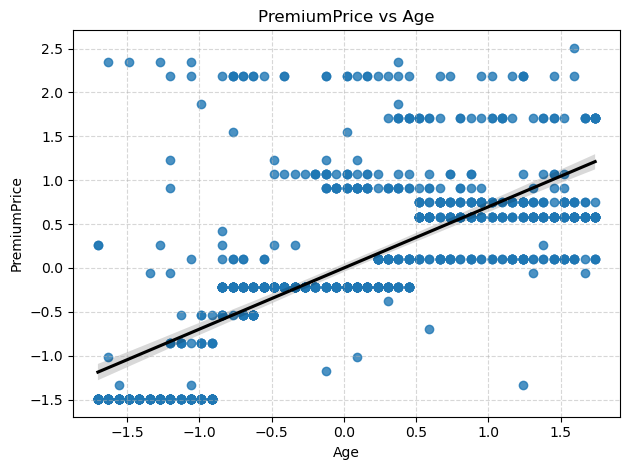

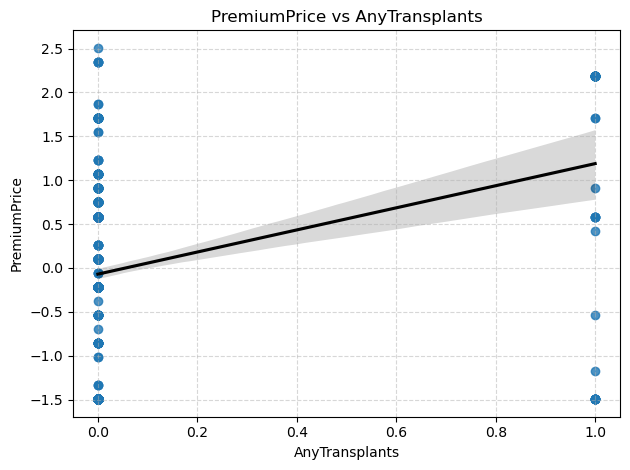

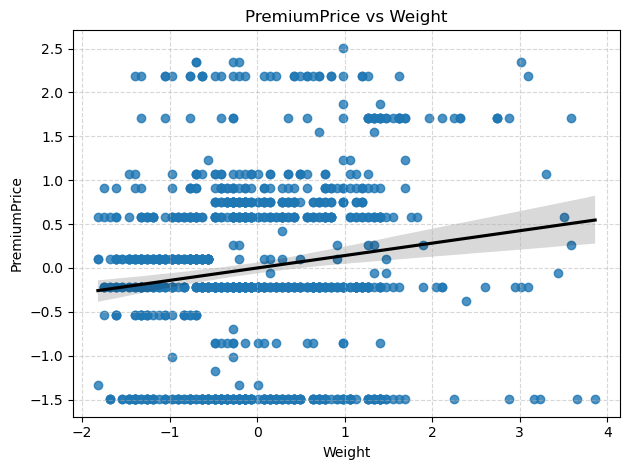

In [21]:
list1 = ['Age','AnyTransplants','Weight']
for col in list1:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')  # safely convert

for i in list1:
    sns.regplot(x=i, y="PremiumPrice", data=final_df, line_kws={"color": "black"})
    plt.title(f"PremiumPrice vs {i}")
    plt.xlabel(i)
    plt.ylabel("PremiumPrice")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [22]:
x_new = no_premium[['Age']].to_numpy().reshape(-1,1)


In [23]:
x_new1 = no_premium[['Age','AnyTransplants']].to_numpy().reshape(-1,2)
x_new1

array([[ 0.23319694,  0.        ],
       [ 1.30798124,  0.        ],
       [-0.41167363,  0.        ],
       ...,
       [ 1.02137209,  0.        ],
       [ 0.37650152,  0.        ],
       [-1.48645793,  0.        ]])

In [24]:
x_new2 = no_premium[['Age','AnyTransplants','Weight']].to_numpy().reshape(-1,3)
x_new2

array([[ 0.23319694,  0.        , -1.39924954],
       [ 1.30798124,  0.        , -0.27706151],
       [-0.41167363,  0.        , -1.25897603],
       ...,
       [ 1.02137209,  0.        , -0.41733501],
       [ 0.37650152,  0.        , -0.27706151],
       [-1.48645793,  0.        , -0.13678801]])

In [25]:
y = np.array(final_df['PremiumPrice']).reshape(-1,1)

In [26]:
x_new_train , x_new_test , y_new_train , y_new_test = train_test_split(x_new,y,train_size = 0.7,random_state = 42)
x_new_train1 , x_new_test1 , y_new_train1 , y_new_test1 = train_test_split(x_new1,y,train_size = 0.7,random_state = 42)
x_new_train2 , x_new_test2 , y_new_train2 , y_new_test2 = train_test_split(x_new2,y,train_size = 0.7,random_state = 42)


In [27]:
multi_model = LinearRegression().fit(x_new_train,y_new_train)
multi_model1 = LinearRegression().fit(x_new_train1,y_new_train1)
multi_model2 = LinearRegression().fit(x_new_train2,y_new_train2)

In [28]:
print(multi_model.intercept_)
print(multi_model1.intercept_)
print(multi_model2.intercept_)

[-0.02087458]
[-0.07767831]
[-0.07685802]


In [29]:
print(multi_model.coef_)
print(multi_model1.coef_)
print(multi_model2.coef_)

[[0.67556632]]
[[0.67813942 1.05969826]]
[[0.68657768 1.07423918 0.14259828]]


In [30]:
y_new_pred = multi_model.predict(x_new_test)
y_new_pred1 = multi_model1.predict(x_new_test1)
y_new_pred2 = multi_model2.predict(x_new_test2)

In [31]:
mse_new = mean_squared_error(y_new_test,y_new_pred)
print(format(mse_new,".2f"))
mse_new1 = mean_squared_error(y_new_test1,y_new_pred1)
print(format(mse_new1,".2f"))
mse_new2 = mean_squared_error(y_new_test2,y_new_pred2)
print(format(mse_new2,".2f"))

0.58
0.43
0.39


In [32]:
rmse = root_mean_squared_error(y_new_test,y_new_pred) # RMSE
print(rmse)
rmse1 = root_mean_squared_error(y_new_test1,y_new_pred1) # RMSE
print(rmse1)
rmse2 = root_mean_squared_error(y_new_test2,y_new_pred2) # RMSE
print(rmse2)

0.7602847544469274
0.6553558406424111
0.6261508144677058


In [33]:
mae = mean_absolute_error(y_new_test,y_new_pred) # for mean absolute error
print(mae)
mae1 = mean_absolute_error(y_new_test1,y_new_pred1) # for mean absolute error
print(mae1)
mae2 = mean_absolute_error(y_new_test2,y_new_pred2) # for mean absolute error
print(mae2)

0.536752179682715
0.4877572581696271
0.464362045322813


In [34]:
r_square_2 = r2_score(y_new_test, y_new_pred)
print(r_square_2)
r_square_21 = r2_score(y_new_test1, y_new_pred1)
print(r_square_21)
r_square_22 = r2_score(y_new_test2, y_new_pred2)
print(r_square_22)

0.4858229929013701
0.6179550734392154
0.6512469713260661


# The model is bad model as its having only 65% when we have taken 3 independent columns

In [36]:
df_res = pd.DataFrame()

In [37]:
df_res["y_predicted"] = pd.DataFrame(y_new_pred) # Assinging new predicted values to new column in the df
df_res["y_predicted"]

0      0.378695
1     -0.153770
2      1.104783
3     -0.637829
4      0.281883
         ...   
291    0.814348
292   -0.976670
293   -0.008552
294   -0.541017
295   -0.637829
Name: y_predicted, Length: 296, dtype: float64

In [38]:
df_res["y_actual"] = pd.DataFrame(y_new_test)
df_res["y_actual"]

0      1.066977
1      1.066977
2      0.746721
3     -1.495067
4     -0.214045
         ...   
291    0.586594
292   -1.495067
293   -0.214045
294   -0.214045
295   -1.495067
Name: y_actual, Length: 296, dtype: float64

In [39]:
df_res["residual"] = abs(df_res["y_predicted"] - df_res["y_actual"])
df_res

,y_predicted,y_actual,residual
0,0.378695,1.066977,0.688282
1,-0.153770,1.066977,1.220747
2,1.104783,0.746721,0.358062
3,-0.637829,-1.495067,0.857238
4,0.281883,-0.214045,0.495928
...,...,...,...
291,0.814348,0.586594,0.227754
292,-0.976670,-1.495067,0.518397
293,-0.008552,-0.214045,0.205493
294,-0.541017,-0.214045,0.326972


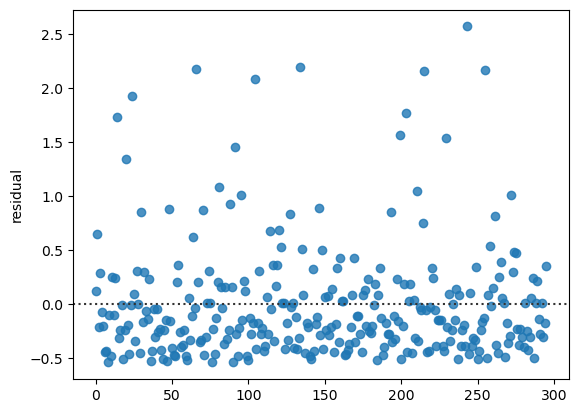

In [40]:
# residual plot
sns.residplot(x=df_res.index, y ="residual" , data = df_res);

In [41]:
# As above shown figure homoscedasticity is followed
# And the assumption is normality of residuals